# Problem Statement
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.
### Data Description:
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

    ID                  --  Unique ID
    Balance             --  Number of miles eligible for award travel
    Qual_mile           --  Number of miles counted as qualifying for Topflight status
    cc1_miles           --  Number of miles earned with freq. flyer credit card in the past 12 months:
    cc2_miles           --  Number of miles earned with Rewards credit card in the past 12 months:
    cc3_miles           --  Number of miles earned with Small Business credit card in the past 12 months:
                            (1 = under 5,000, 2 = 5,000 - 10,000, 3 = 10,001 - 25,000, 4 = 25,001 - 50,000, 5 = over 50,000)
    Bonus_miles         --  Number of miles earned from non-flight bonus transactions in the past 12 months
    Bonus_trans         --  Number of non-flight bonus transactions in the past 12 months
    Flight_miles_12mo   --  Number of flight miles in the past 12 months
    Flight_trans_12     --  Number of flight transactions in the past 12 months
    Days_since_enrolled --  Number of days since enrolled in flier program
    Award               --  whether that person had award flight (free flight) or not

# Importing Necessary Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

# Importing Data

In [65]:
raw_data = pd.read_csv('EastWestAirlines.csv')
raw_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [66]:
data = raw_data.drop(['ID#','Award?'], axis = 1)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


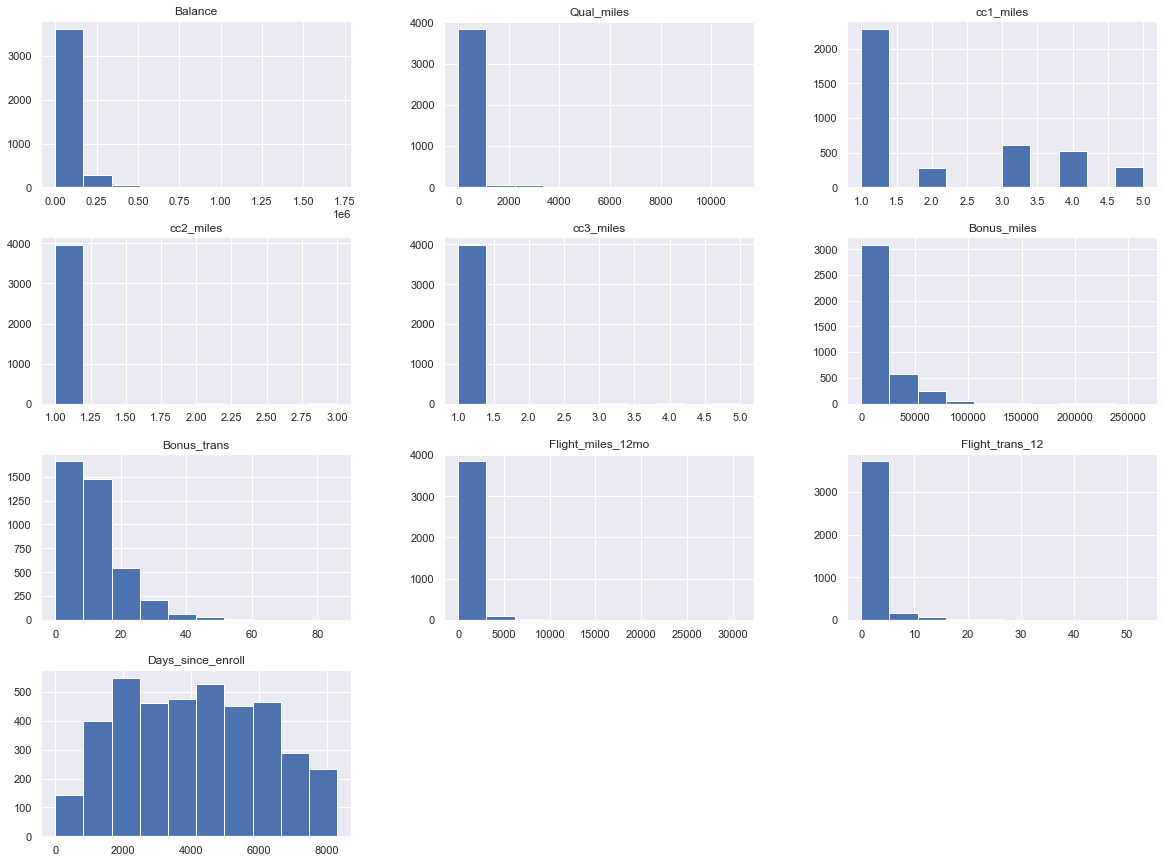

In [68]:
data.hist(figsize=(20,15))
plt.show()

In [69]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


# 

# --------------------------------------Hierarchical Clustering---------------------------------                            

### Selecting Features

In [70]:
x = data

### Standardization

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

### Dendrogram

In [73]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [74]:
z = linkage(x_scaled, method="complete",metric="euclidean")

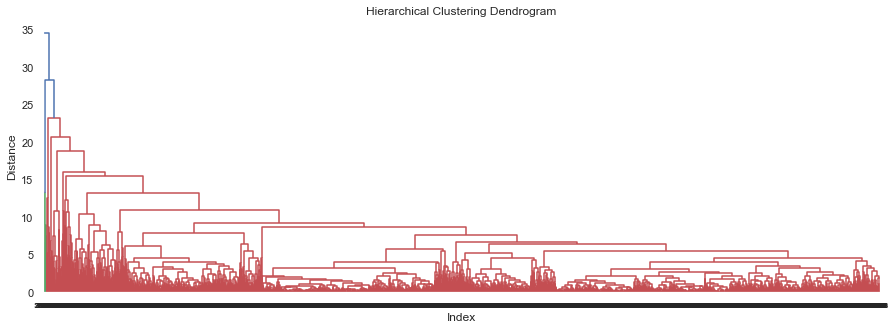

In [75]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0., leaf_font_size = 8.)  # rotates the x axis labels # font size for the x axis labels
plt.show()

### Agglomerative Clustering

In [76]:
from sklearn.cluster import  AgglomerativeClustering 
hierarchial = AgglomerativeClustering(n_clusters = 4, linkage ='complete', affinity = "euclidean").fit(x_scaled) 
hierarchial.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
cluster_labels = pd.Series(hierarchial.labels_)
raw_data['hierarchial_clusters'] = cluster_labels 
raw_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hierarchial_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [78]:
raw_data.iloc[:,1:11].groupby(raw_data.hierarchial_clusters).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
hierarchial_clusters,,,,,,,,,,
0,70349.018402,142.182506,2.052180,1.014621,1.000756,16765.457777,11.465087,436.559113,1.307285,4109.267204
1,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
3,973710.307692,746.615385,2.538462,1.000000,1.000000,29401.076923,16.615385,1576.384615,6.615385,6972.846154


# 

# ---------------------------------------K-Means Clustering----------------------------------------

In [79]:
from sklearn.cluster import KMeans

### Elbow Method for Optimal K

In [80]:
wcss =[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[39990.0,
 32088.25822848423,
 27558.75260991011,
 23807.810658831717,
 20348.78522308944,
 17725.004540956208,
 15870.976707813208,
 14358.321830136332,
 13238.51640587382]

Text(0, 0.5, 'WCSS')

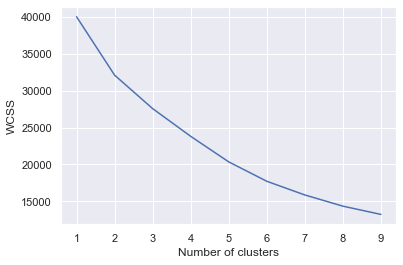

In [81]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [82]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(x_scaled)
    sil_score1= silhouette_score(x_scaled, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.35826638416515033
For n_clusters = 3 The average silhouette_score is : 0.330411996315242
For n_clusters = 4 The average silhouette_score is : 0.3322237914091003
For n_clusters = 5 The average silhouette_score is : 0.34818137095348617
For n_clusters = 6 The average silhouette_score is : 0.35990130799241493
For n_clusters = 7 The average silhouette_score is : 0.2590199600553473
For n_clusters = 8 The average silhouette_score is : 0.26819091939498757
For n_clusters = 9 The average silhouette_score is : 0.2821304457163712


### K-Means Modelling

In [83]:
kmeans =KMeans(6)
kmeans.fit(x_scaled)

KMeans(n_clusters=6)

In [84]:
kmeans.labels_ 

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
kmeans_labels = pd.Series(kmeans.labels_)   
raw_data['kmeans_clusters'] = kmeans_labels 
raw_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hierarchial_clusters,kmeans_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1


In [86]:
raw_data.iloc[:,1:11].groupby(raw_data.kmeans_clusters).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
kmeans_clusters,,,,,,,,,,
0,42556.929280,48.002481,1.165840,1.000000,1.000414,4161.548801,6.524400,212.131514,0.646402,3706.724979
1,115572.665408,53.138218,3.684290,1.000000,1.001511,38257.293051,18.718278,322.972810,0.975076,4820.523414
2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233
3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
4,117326.186441,5445.305085,2.033898,1.000000,1.000000,19059.610169,12.305085,965.796610,2.881356,3874.830508
5,188971.328571,474.528571,2.271429,1.000000,1.000000,33441.864286,28.114286,5782.700000,16.785714,4688.557143


# 

# ---------------------------------DBSCAN Clustering-------------------------------------------

In [87]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.1, min_samples=3)
dbscan.fit(x_scaled)

DBSCAN(eps=1.1, min_samples=3)

In [88]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
dbscan_labels = pd.Series(dbscan.labels_)
raw_data['dbscan_clusters'] = dbscan_labels 
raw_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hierarchial_clusters,kmeans_clusters,dbscan_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,0


In [90]:
raw_data.iloc[:,1:11].groupby(raw_data.dbscan_clusters).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
dbscan_clusters,,,,,,,,,,
-1,202656.945596,1112.544041,2.901554,1.044041,1.126943,46406.012953,24.740933,2739.740933,7.968912,4747.950777
0,59844.520909,29.014033,1.974460,1.000000,1.000000,13986.358406,10.130508,217.907943,0.672186,4052.940780
1,56787.000000,2418.500000,1.000000,1.000000,1.000000,3687.500000,1.500000,0.000000,0.000000,6834.500000
2,40547.047619,0.000000,1.000000,2.000000,1.000000,8778.000000,13.047619,126.190476,0.523810,3564.095238
3,61813.600000,1926.400000,3.600000,1.000000,1.000000,38670.800000,15.200000,300.000000,0.800000,4778.200000
4,30501.100000,0.000000,1.000000,3.000000,1.000000,14904.900000,15.000000,40.000000,0.200000,3753.000000
5,243553.333333,0.000000,4.000000,1.000000,1.000000,38112.333333,36.000000,66.666667,0.333333,3918.333333
6,76433.333333,0.000000,4.000000,1.000000,1.000000,48567.333333,40.333333,66.666667,0.333333,2172.000000
7,56856.250000,6047.250000,1.000000,1.000000,1.000000,3648.500000,4.000000,216.750000,0.750000,3726.500000


# 

# Interpretation
### Optimal Number of Clusters for the Crime Data are 6 as found by Elbow Method in K-Means Model

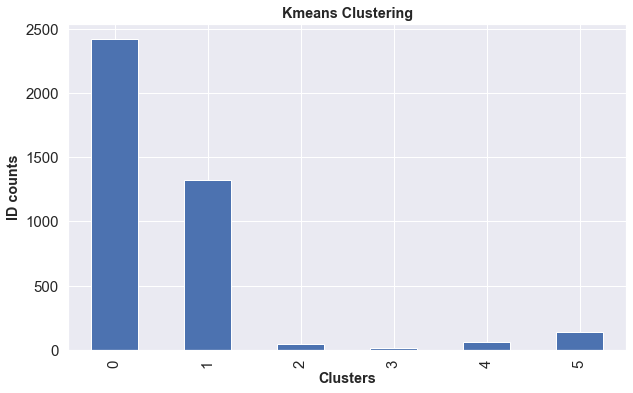

In [91]:
fig, ax = plt.subplots(figsize=(10, 6))
raw_data.groupby(['kmeans_clusters']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [94]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(raw_data.loc[raw_data.kmeans_clusters==0].mean(), columns= ['Cluster1'])
cluster2 = pd.DataFrame(raw_data.loc[raw_data.kmeans_clusters==1].mean(), columns= ['Cluster2'])
cluster3 = pd.DataFrame(raw_data.loc[raw_data.kmeans_clusters==2].mean(), columns= ['Cluster3'])
cluster4 = pd.DataFrame(raw_data.loc[raw_data.kmeans_clusters==3].mean(), columns= ['Cluster4'])
cluster5 = pd.DataFrame(raw_data.loc[raw_data.kmeans_clusters==4].mean(), columns= ['Cluster5'])
cluster6 = pd.DataFrame(raw_data.loc[raw_data.kmeans_clusters==5].mean(), columns= ['Cluster6'])

In [95]:
clusters_data = pd.concat([cluster1,cluster2,cluster3,cluster4,cluster5,cluster6],axis=1)
clusters_data.drop(['ID#','hierarchial_clusters','kmeans_clusters','dbscan_clusters'], axis = 0)

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6
Balance,42556.929280,115572.665408,68876.581395,138061.400000,117326.186441,188971.328571
Qual_miles,48.002481,53.138218,23.255814,78.800000,5445.305085,474.528571
cc1_miles,1.165840,3.684290,1.139535,3.466667,2.033898,2.271429
cc2_miles,1.000000,1.000000,2.348837,1.000000,1.000000,1.000000
cc3_miles,1.000414,1.001511,1.000000,4.066667,1.000000,1.000000
Bonus_miles,4161.548801,38257.293051,14689.837209,93927.866667,19059.610169,33441.864286
Bonus_trans,6.524400,18.718278,17.534884,28.066667,12.305085,28.114286
Flight_miles_12mo,212.131514,322.972810,582.627907,506.666667,965.796610,5782.700000
Flight_trans_12,0.646402,0.975076,2.209302,1.600000,2.881356,16.785714
Days_since_enroll,3706.724979,4820.523414,3968.930233,4613.866667,3874.830508,4688.557143


# Inference
    * The Clusters 1 and 2 have more number of fliers.
    * These Fliers has less number of flight miles and transactions.
    * Cluster 2 has Award average of 0.55, which means these flies are awarded more in the past.
    * Cluster 1 has Award average of 0.23, which means these flies are not awarded more in the past.
    * So, if this Cluster 1 fliers are given mileage offers, they will increase transactions and fly more. 